In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

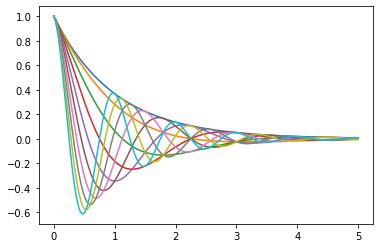

In [2]:
x = np.linspace(0,5,1000)
for theta in np.linspace(0,2,10):
    y = np.cos(np.pi*theta*x)*np.exp(-x)
    plt.plot(x, y)
plt.show()

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

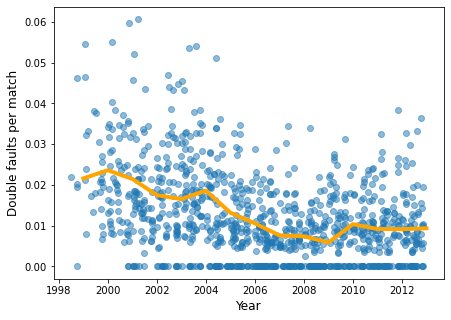

In [3]:
pd.set_option('display.max_rows', None)
df = pd.read_csv('data/tennis.csv')
df['start date'] = pd.to_datetime(df['start date'])
df['ratio'] = df['player1 double faults']/df['player1 total points total'] 
df_double = df.groupby('year').mean()[['ratio']]
df_double['time'] = df_double.index
df_double['time'] = pd.to_datetime(df_double['time'].astype(str)+'-12-31')

# Graph
fig, ax = plt.subplots(figsize = (7,5))
ax = plt.scatter(x = df['start date'], y = df['ratio'], alpha = 0.5)
ax = plt.plot(df_double['time'], df_double['ratio'], color = 'orange', linewidth=4)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Double faults per match', fontsize=12)
plt.show()

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [4]:
import datetime as dt
from pandas_datareader import data

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)



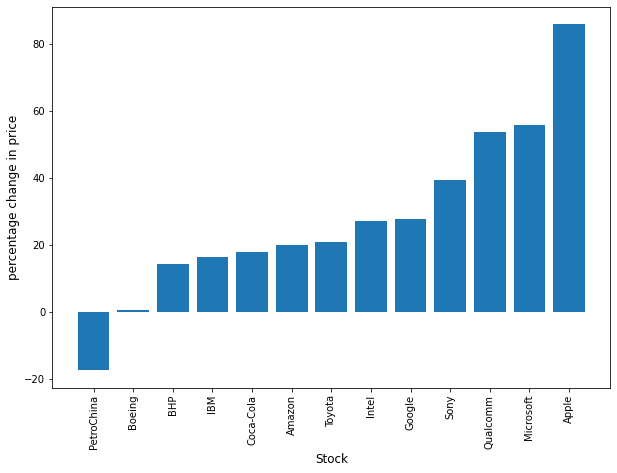

In [5]:
ticker_t = ticker.T
ticker_t['price_change'] = (ticker_t['2019-12-31']-ticker_t['2019-01-02'])/ticker_t['2019-01-02']*100
ticker_t = ticker_t.sort_values('price_change')
ticker_t['stock company'] = ticker_t.index.map(ticker_list)


#Graph
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(ticker_t['stock company'], ticker_t['price_change'])
plt.xlabel('Stock', fontsize=12)
plt.ylabel('percentage change in price', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.show()

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [6]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

ticker4 = read_data(indices_list, start=dt.datetime(1970,1, 2), end=dt.datetime(2019, 12, 31))


In [7]:
ticker4 = ticker4.resample('BYS').last()
col_names = ticker4.columns
new_col_names = []
for name in col_names:
    new_col_name = name + '_pct_chg'
    new_col_names.append(new_col_name)
    ticker4[new_col_name] = ticker4[name].pct_change()



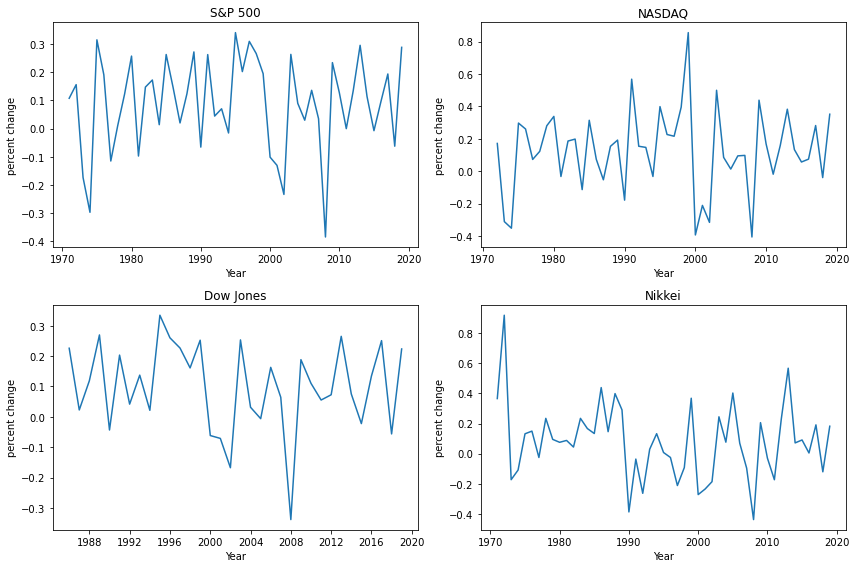

Note: For the S&P 500, the graph does not include the data before 1970. The datareader was not able to read the data.


In [8]:
#Graph
num_rows = 2
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize = (12,8))
graph_titles = list(pd.Series(col_names).map(indices_list))
for i in range(num_rows):
    for j in range(num_cols):
        curr_col = new_col_names.pop(0)
        curr_graph_title = graph_titles.pop(0)
        axs[i,j].plot(ticker4.index, ticker4[curr_col])
        axs[i,j].set(title=curr_graph_title)
        axs[i,j].set_xlabel('Year')
        axs[i,j].set_ylabel('percent change')
        plt.tight_layout()
plt.show()
print('Note: For the S&P 500, the graph does not include the data before 1970. The datareader was not able to read the data.')

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

In [9]:
df = pd.read_csv('data/tennis.csv')

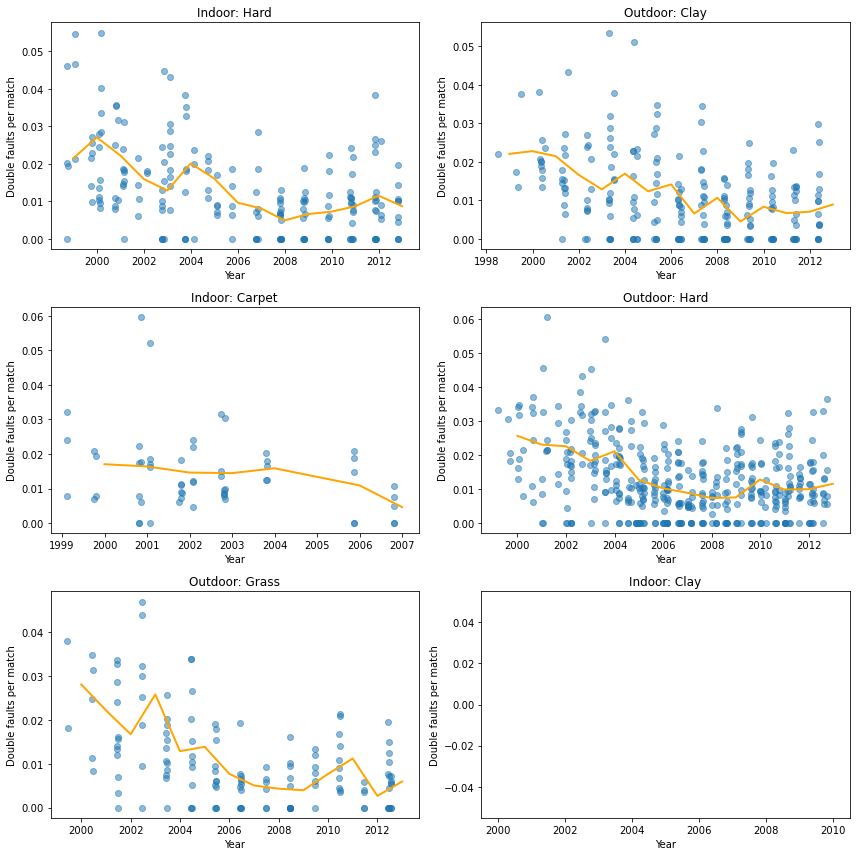

In [10]:
df['ratio'] = df['player1 double faults']/df['player1 total points total']
df['start date'] = pd.to_datetime(df['start date'])
df['time'] = pd.to_datetime(df['year'].astype(str)+'-12-31')

surfaces = df['surface'].unique()
dfs_surface = {}

for surface in surfaces:
    dfs_surface[surface] = {'double_faults' : df[(df['surface'] == surface) & (df['ratio'].notna())][['start date', 'ratio']]}
    dfs_surface[surface]['double_faults_mean'] = df[(df['surface'] == surface) & (df['ratio'].notna())][['time', 'ratio']]
    dfs_surface[surface]['double_faults_mean'] = dfs_surface[surface]['double_faults_mean'].groupby('time').mean().reset_index()

#Graph 
surfaces_not_graphed = list(surfaces.copy())
num_rows, num_cols = 3, 2
fig, axs = plt.subplots(num_rows, num_cols, figsize = (12,12))
for i in range(num_rows):
    for j in range(num_cols):
        curr_surface = surfaces_not_graphed.pop(0)
        axs[i][j].scatter(x=dfs_surface[curr_surface]['double_faults']['start date'], y=dfs_surface[curr_surface]['double_faults']['ratio'], alpha = 0.5)
        axs[i][j].plot(dfs_surface[curr_surface]['double_faults_mean']['time'], dfs_surface[curr_surface]['double_faults_mean']['ratio'], color = 'orange', linewidth='2')
        axs[i][j].set(title=curr_surface)
        axs[i,j].set_xlabel('Year')
        axs[i,j].set_ylabel('Double faults per match')
plt.tight_layout()
plt.show()
